In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from random import randrange
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
class RidgeRegression() :
    def __init__( self, alpha_learning_rate, iterations, l2__ridgepenality) :
        self.param1 = alpha_learning_rate
        #model which uses L2 is called Ridge Regression  
        #Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.
        self.param2 = iterations
        self.param3 = l2__ridgepenality

    # Function for model training            
    def fit(self, X, Y ) :        
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradient descent learning        
        for i in range( self.param2 ) :
            self.update_weights()
        return self
      
     # Helper function to update weights in gradient descent
    def update_weights(self ) :
        Y_predicted = self.predict( self.X )
          
    # calculate gradients      
       
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_predicted ) ) +               
               ( 2 * self.param3 * self.W ) ) / self.m
        db = - 2 * np.sum( self.Y - Y_predicted ) / self.m 
                  
        # update weights    
        self.W = self.W - self.param1 * dW
        self.W = self.W[0][0]
        self.b = self.b - self.param1 * db
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

    def get_params(self, deep=True):
        # suppose this estimator has parameters "alpha" and "recursive"
        return {"alpha_learning_rate": self.param1, "iterations": self.param2,"l2__ridgepenality": self.param3}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [18]:
# Importing dataset
dataset = pd.read_csv("Salary_Data.csv")
dataset = dataset.dropna()
dataset.head()
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values
X_train, X_test, Y_train, Y_test = train_test_split( X, Y,test_size = 1/3, random_state = 0 )
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
print("Shape of train data of X = % s and Y = % s "%(X_train.shape, Y_train.shape)) 
print("Shape of test data of X = % s and Y = % s"%(X_test.shape, Y_test.shape)) 


Shape of train data of X = (20, 1) and Y = (20, 1) 
Shape of test data of X = (10, 1) and Y = (10, 1)


This problem uses the mean squared error, mse as the scoring metric. However, this metric returns negative values. Therefore, we need to use abs(mse) to get positive values.

The mse takes the errors: difference between the actual values and those predicted by the model, and find the mean of the squares.

It isn’t null and the negative sign does not make it ineffective. A high mse means that the error is large.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

model = RidgeRegression(iterations = 1000, alpha_learning_rate = 0.01, l2__ridgepenality = 1 )
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
kf5 = KFold(n_splits=5, shuffle=True, random_state = 42)
#Grid search - technique used to identify the optimal hyperparameters for a model
ridge= GridSearchCV(model, alpha_values, scoring='neg_mean_squared_error', cv=kf5 )

5-Fold cross validation(K=5). Here, the data set is split into 5 folds

In [20]:
ridge.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=<__main__.RidgeRegression object at 0x0000025D61F0FF60>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).

In [21]:
# Prediction on validation set
Y_predicted = ridge.predict( X_test )
               
print("\n Regularization coefficient: ",r2_score(Y_test,Y_predicted))
mse = np.sqrt(mean_squared_error(Y_test,Y_predicted))
print("\n Mean Squared error: ",round(mse,3))


 Regularization coefficient:  0.9745359679004827

 Mean Squared error:  4619.969


#### Mean Squared Error(MSE) :The error should decrease as we increase our sample data as the distribution of our data becomes narrower and narrower (referring to normal distribution). The more data we have, the less is the error. But in the case of Sum of Squared Errors(SSE), the complete opposite is happening. 
Here, we have — Mean Squared Error(MSE). 
We take the average or mean of SSE. So more the data, the lesser will be the aggregated error, MSE.

In [22]:
print( "\nPredicted values ", np.round( Y_predicted[:3], 2 ) )     
print( "Actual values      ", Y_test[:3] )    


Predicted values  [[ 41082.7 ]
 [122663.28]
 [ 65186.05]]
Actual values       [[ 37731.]
 [122391.]
 [ 57081.]]


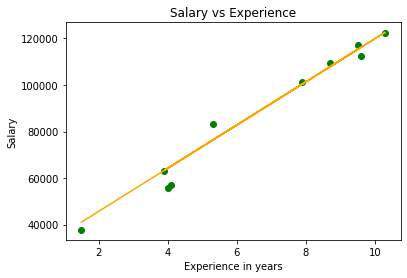

In [23]:
# Visualization on test set     
plt.scatter( X_test, Y_test, color = 'green' )    
plt.plot( X_test, Y_predicted, color = 'orange' )    
plt.title( 'Salary vs Experience' )    
plt.xlabel( 'Experience in years' )    
plt.ylabel( 'Salary' )    
plt.show()